In [166]:
import pandas as pd
import numpy as np
import scipy
import os 
import glob
from datetime import datetime, timedelta, date
from matplotlib import pyplot as plt
from functools import reduce
import statsmodels.api as smf


**OTC Simulated Data**<br><br>
**Alpha Fund Stars**<br>
    Alpha, buys before it pumps, sells before it dumps.<br>
    Simulated for 20 trades<br>
    Buys before the top 10 pumps, and sells before the top 10 dumps, in 1 period<br>
    Size Varies from (20,60)<br><br><br><br>
**Billy the Beta Miner**<br>
    Miner, who sells constant size, 25% of selling every time period<br>
    Size varies from (48,52)<br>
    P(selling) =25%<br>
    <br><br>
**Charlie the Chad**<br>
    Chad who trades like a maniac and frequently<br>
    Size varies from (20,60)<br>
    P(buy) = 40%, P(sell) = 43%, P(No trade) = 17%

In [167]:
path = 'C://Users//TM//Documents//Python Scripts//Binance download//OTC//'                     
     # advisable to use os.path.join as this makes concatenation OS independent
filename = 'OTC Simulated details.csv'    
f = path + filename
df_otc_file = (pd.read_csv(f))
df_otc_file.sort_values(by=['Time period'])
# Replace NaN with 0 
df_otc_file = df_otc_file.fillna(0)
#delete if buy and sell are both = 0, because this means that they did not make any trade at all 
#Find standard deviation in size and standard deviation in frequency of trading

#df_otc_file = df_otc_file[(df_otc_file.Buy = 0) & (df_otc_file.Sell =0)]

df_otc_file = df_otc_file[(df_otc_file.Buy != 0) | (df_otc_file.Sell !=0)]
df_otc_file = df_otc_file.sort_values(by=['Time period'])
Counterparties = df_otc_file['Counterparty'].unique()
df_otc_file['Size Difference in transaction'] = df_otc_file.groupby('Counterparty')['Size'].diff()
df_otc_file['Time Difference in transaction'] = df_otc_file.groupby('Counterparty')['Time period'].diff()
df_otc_file['Size Difference in transaction'] = df_otc_file.groupby('Counterparty')['Size'].diff()
df_otc_file = df_otc_file.sort_values(by=['Counterparty','Time period'])
df_otc_file['std in size'] = df_otc_file['Size Difference in transaction']\
.rolling(len(df_otc_file.groupby('Counterparty')['Size']\
            ),min_periods=2).std()

#df_plot = df_otc_file.groupby('Counterparty', as_index=False)['Size'].mean()
x = ['Size', 'Time Difference in transaction']
#st_dev = prices.groupby('ticker')['lret'].agg(['mean', 'std'])
df_plot = df_otc_file.groupby('Counterparty', as_index=False)['Size'].agg(['std','mean'])
df_plot_2 = df_otc_file.groupby('Counterparty', as_index=False)['Time Difference in transaction'].agg(['std'])
df_plot=df_plot.merge(df_plot_2, on='Counterparty', how='left')
columns_for_plotting = ['size std', 'mean size', 'Trade Frequency std']


df_plot=df_plot.rename(columns = {'std_x':'size std', 'mean':'mean size','std_y':'Trade Frequency std'})

df_plot = df_plot.round(1)

#ax = df_plot.plot.bar(ylabel = "Standard deviation / Size")
#df_otc_file['Time Difference in transaction'] = df_otc_file.groupby('Counterparty')['Time period'].diff()

#ax = df_final.plot.bar(x='Counterparty',ylabel = "Standard deviation",\
 #                 y=Standard_deviation_plot)

#for container in ax.containers:
#    ax.bar_label(container)


In [168]:
df_plot = df_otc_file.groupby('Counterparty', as_index=False)['Size'].agg(['std','mean']).reset_index()
df_plot = df_otc_file.groupby('Counterparty', as_index=False)['Size'].agg(['std','mean']).reset_index()
df_plot_2 = df_otc_file.groupby('Counterparty', as_index=False)['Time Difference in transaction'].agg(['std']).reset_index()
df_plot_3 = df_otc_file.groupby('Counterparty', as_index=False)['Buy'].sum()
df_plot_4 = df_otc_file.groupby('Counterparty', as_index=False)['Sell'].sum()

x = ['Counterparty','Standard deviation in size', 'Average Size']

df_plot = df_plot.set_axis(x,axis =1)
y = ['Counterparty','Standard deviation in Frequency']
z = ['Counterparty','Number of buys']
k = ['Counterparty','Number of sells']

df_plot_2 = df_plot_2.set_axis(y,axis =1)
df_plot_3 = df_plot_3.set_axis(z,axis =1)
df_plot_4 = df_plot_4.set_axis(k,axis =1)

In [169]:
y = [df_plot,df_plot_2,df_plot_3,df_plot_4]
dfs = [df_plot,df_plot_2,df_plot_3,df_plot_4]

df_final = reduce(lambda left,right: pd.merge(left,right,on='Counterparty'), dfs)

In [170]:
df_final['% of buy'] = (100* df_final[ 'Number of buys'] / (df_final['Number of buys'] + df_final['Number of sells']))
df_final['% of sells'] = (100* df_final[ 'Number of sells'] / (df_final['Number of buys'] + df_final['Number of sells']))

df_final = df_final.round(1)
df_final

,Counterparty,Standard deviation in size,Average Size,Standard deviation in Frequency,Number of buys,Number of sells,% of buy,% of sells
0,Alpha Fund Stars,10.6,45.0,108.4,20.0,20.0,50.0,50.0
1,Billy the Beta Miner,1.4,50.0,3.2,0.0,603.0,0.0,100.0
2,Charlie the Chad,11.8,40.0,0.5,987.0,980.0,50.2,49.8


**Stats to plot**

In [171]:
Standard_deviation_plot = ['Standard deviation in size', 'Standard deviation in Frequency']
absolute_num_plot = ['Average Size','Number of buys','Number of sells']
percentages_plot = ['% of buy','% of sells']
#plot number of buys, number of sells, average buy size, average sell size

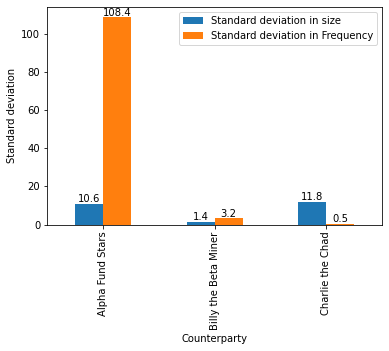

In [172]:
ax = df_final.plot.bar(x='Counterparty',ylabel = "Standard deviation",\
                  y=Standard_deviation_plot)

for container in ax.containers:
    ax.bar_label(container)

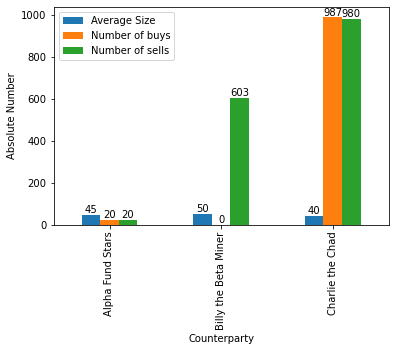

In [173]:
ax = df_final.plot.bar(x='Counterparty',ylabel = "Absolute Number",\
                  y=absolute_num_plot)


for container in ax.containers:
    ax.bar_label(container)

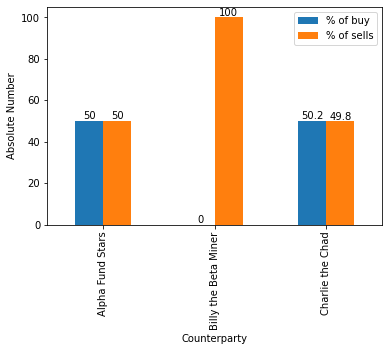

In [174]:
ax = df_final.plot.bar(x='Counterparty',ylabel = "Absolute Number",\
                  y=percentages_plot)


for container in ax.containers:
    ax.bar_label(container)

In [175]:
df_final

,Counterparty,Standard deviation in size,Average Size,Standard deviation in Frequency,Number of buys,Number of sells,% of buy,% of sells
0,Alpha Fund Stars,10.6,45.0,108.4,20.0,20.0,50.0,50.0
1,Billy the Beta Miner,1.4,50.0,3.2,0.0,603.0,0.0,100.0
2,Charlie the Chad,11.8,40.0,0.5,987.0,980.0,50.2,49.8


**Downloading Binance data** <br><br>
URL:https://github.com/binance/binance-public-data/tree/master/python<br><br>
<br><br>

**To compare what happened in the market once transaction occurs, we use data from binance**

<br><br>


<br><br>
python download-kline.py -s ETHUSDT -startDate 2021-01-01 -endDate 2022-01-01 -i 4h<br>

Start from 2021 to 2022, 4h interval, with the following values
<br><br>
"Open time"," Open"," High","Low","Close","Volume","Close time",<br>"Quote asset volume","Number of trades","Taker buy base asset volume",<br> "Taker buy quote asset volume","Ignore"<br><br>

plot % change in 1 period, % change in 3 period, % change in 5 period <br>
plot % change in after 1 period, % change in after 3 period, % change in after 5 period

In [176]:
#start of time series data from binance

path = 'C:\\Users\\TM\\Documents\\Python Scripts\\Binance download\\python\\data\\spot\\monthly\\klines\\ETHUSDT\\4h\\2021-01-01_2022-01-01'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
df_from_each_file = (pd.read_csv(f, header = None) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True, axis = 0,)
# Finally, the files are joined
#print(df)

x = ["Open time"," Open"," High","Low","Close","Volume","Close time","Quote asset volume","Number of trades","Taker buy base asset volume",
           "Taker buy quote asset volume","Ignore"]
concatenated_df.columns = x
concatenated_df['Date_time'] = pd.to_datetime(concatenated_df['Open time'], unit='ms')
concatenated_df['% change in 1 period']=concatenated_df['Close'].pct_change()*100
concatenated_df['% change in 3 period']=concatenated_df['Close'].pct_change(3)*100
concatenated_df['% change in 5 period']=concatenated_df['Close'].pct_change(5)*100

concatenated_df['% change in after 1 period']= concatenated_df['% change in 1 period'].shift(-1)
concatenated_df['% change in after 3 period']= concatenated_df['% change in 3 period'].shift(-3)
concatenated_df['% change in after 5 period']= concatenated_df['% change in 5 period'].shift(-5)
concatenated_df.insert(1, 'Time period', range(1, len(concatenated_df)+1))


<AxesSubplot:xlabel='Eth Line chart'>

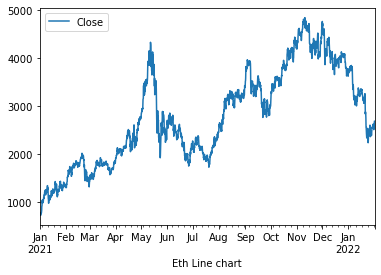

In [177]:
concatenated_df.plot('Date_time', 'Close', xlabel = "Eth Line chart")

**Join with the data from our OTC flows**

In [178]:
#now we need to join the data from mining with this time series data that we have 
Regression_data = concatenated_df.merge(df_otc_file, on='Time period', how='left', indicator=False)
Regression_data.Counterparty.unique()

array(['Charlie the Chad', nan, 'Billy the Beta Miner',
       'Alpha Fund Stars'], dtype=object)

In [180]:
Regression_data['dummy variable_buy'] = np.where(Regression_data['Buy'] == 1, 1, 0)
Regression_data['dummy variable_sell'] = np.where(Regression_data['Sell'] == 1, 1, 0)

<font size="6">
**Billy the Beta Miner**

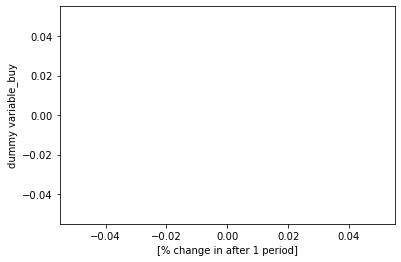

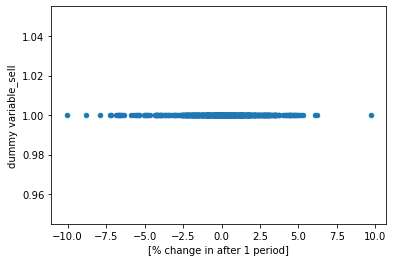

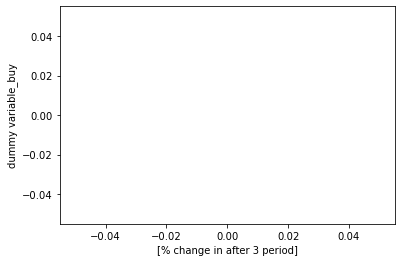

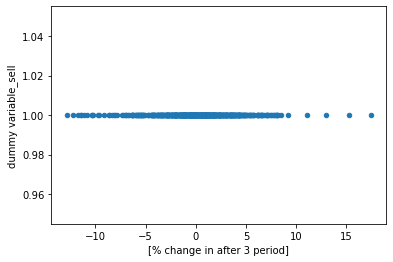

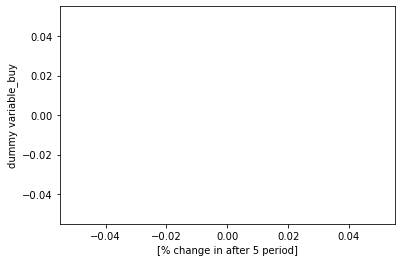

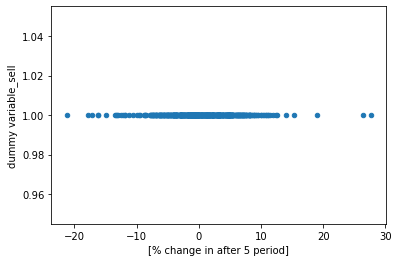

In [181]:
Regression_data_Billy = Regression_data.loc[Regression_data['Counterparty'] == 'Billy the Beta Miner']
Regression_data_Billy_buy = Regression_data_Billy.loc[Regression_data['dummy variable_buy'] == 1]
ax1 = Regression_data_Billy_buy.plot.scatter(y='dummy variable_buy',x=['% change in after 1 period'])
Regression_data_Billy_sell = Regression_data_Billy.loc[Regression_data['dummy variable_sell'] == 1]
ax2 = Regression_data_Billy_sell.plot.scatter(y='dummy variable_sell',x=['% change in after 1 period'])
ax3 = Regression_data_Billy_buy.plot.scatter(y='dummy variable_buy',x=['% change in after 3 period'])
Regression_data_Billy_sell = Regression_data_Billy.loc[Regression_data['dummy variable_buy'] != 1]
ax4 = Regression_data_Billy_sell.plot.scatter(y='dummy variable_sell',x=['% change in after 3 period'])
ax5 = Regression_data_Billy_buy.plot.scatter(y='dummy variable_buy',x=['% change in after 5 period'])
Regression_data_Billy_sell = Regression_data_Billy.loc[Regression_data['dummy variable_buy'] != 1]
ax6 = Regression_data_Billy_sell.plot.scatter(y='dummy variable_sell',x=['% change in after 5 period'])

In [182]:
import statsmodels.api as smf
x= Regression_data_Billy['dummy variable_sell']
y = Regression_data_Billy['% change in after 1 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()
#result = smf.OLS(y, x, missing = 'drop').fit()
#print(result.summary())
#result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 1 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                20:15:48   Log-Likelihood:                -1345.6
No. Observations:                         603   AIC:                             2693.
Df Residuals:                             602   BIC:                             2698.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 1 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                20:15:48   Log-Likelihood:                -1345.6
No. Observations:                         603   AIC:                             2693.
Df Residuals:                             602   BIC:                             2698.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_sell     0.0198      0.092      0.216      0.829      -0.161       0.200
==============================================================================
Omnibus:                       65.303   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.876
Skew:                          -0.562   Prob(JB):                     5.80e-37
Kurtosis:                       5.319   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
x= Regression_data_Billy['dummy variable_sell']
y = Regression_data_Billy['% change in after 1 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 1 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                20:15:48   Log-Likelihood:                -1345.6
No. Observations:                         603   AIC:                             2693.
Df Residuals:                             602   BIC:                             2698.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 1 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                20:15:48   Log-Likelihood:                -1345.6
No. Observations:                         603   AIC:                             2693.
Df Residuals:                             602   BIC:                             2698.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_sell     0.0198      0.092      0.216      0.829      -0.161       0.200
==============================================================================
Omnibus:                       65.303   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.876
Skew:                          -0.562   Prob(JB):                     5.80e-37
Kurtosis:                       5.319   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
x= Regression_data_Billy['dummy variable_sell']
y = Regression_data_Billy['% change in after 3 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 3 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                20:15:52   Log-Likelihood:                -1650.4
No. Observations:                         602   AIC:                             3303.
Df Residuals:                             601   BIC:                             3307.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 3 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                20:15:52   Log-Likelihood:                -1650.4
No. Observations:                         602   AIC:                             3303.
Df Residuals:                             601   BIC:                             3307.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_sell     0.1464      0.153      0.956      0.339      -0.154       0.447
==============================================================================
Omnibus:                       30.682   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.676
Skew:                          -0.123   Prob(JB):                     3.37e-20
Kurtosis:                       4.875   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
x= Regression_data_Billy['dummy variable_sell']
y = Regression_data_Billy['% change in after 5 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 5 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                20:16:12   Log-Likelihood:                -1841.6
No. Observations:                         602   AIC:                             3685.
Df Residuals:                             601   BIC:                             3690.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 5 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                20:16:12   Log-Likelihood:                -1841.6
No. Observations:                         602   AIC:                             3685.
Df Residuals:                             601   BIC:                             3690.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_sell     0.4230      0.210      2.011      0.045       0.010       0.836
==============================================================================
Omnibus:                       51.894   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.301
Skew:                           0.100   Prob(JB):                     1.82e-57
Kurtosis:                       6.221   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
a=Regression_data_Billy['% change in after 1 period'].mean()
b=Regression_data_Billy['% change in after 3 period'].mean()
c=Regression_data_Billy['% change in after 5 period'].mean()

Reg_Billy = [a,b,c]
Reg_Billy

[0.01984943293019543, 0.14637587148902537, 0.4230288876093976]

<font size="6">
**Alpha**

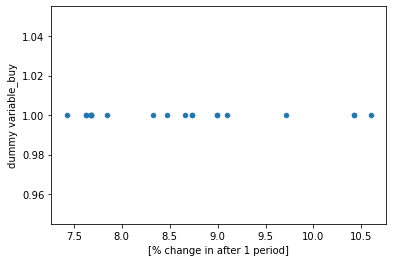

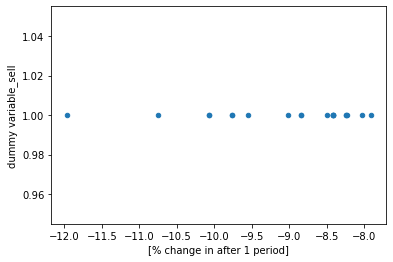

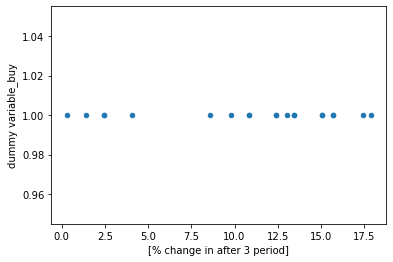

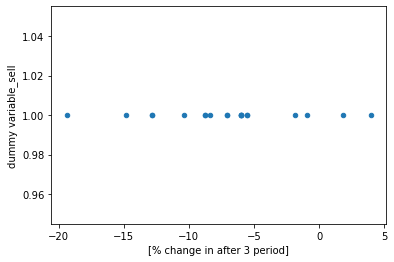

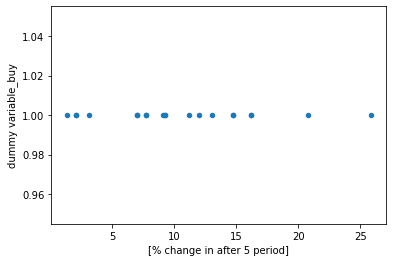

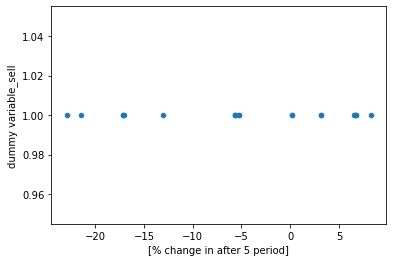

In [187]:
Regression_data_Alpha = Regression_data.loc[Regression_data['Counterparty'] == 'Alpha Fund Stars']
Regression_data_Alpha_buy = Regression_data_Alpha.loc[Regression_data['dummy variable_buy'] == 1]
ax1 = Regression_data_Alpha_buy.plot.scatter(y='dummy variable_buy',x=['% change in after 1 period'])
Regression_data_Alpha_sell = Regression_data_Alpha.loc[Regression_data['dummy variable_buy'] == 0]
ax2 = Regression_data_Alpha_sell.plot.scatter(y='dummy variable_sell',x=['% change in after 1 period'])

ax3 = Regression_data_Alpha_buy.plot.scatter(y='dummy variable_buy',x=['% change in after 3 period'])
Regression_data_Alpha_sell = Regression_data_Alpha.loc[Regression_data['dummy variable_buy'] == 0]
ax4 = Regression_data_Alpha_sell.plot.scatter(y='dummy variable_sell',x=['% change in after 3 period'])

ax5 = Regression_data_Alpha_buy.plot.scatter(y='dummy variable_buy',x=['% change in after 5 period'])
Regression_data_Alpha_sell = Regression_data_Alpha.loc[Regression_data['dummy variable_buy'] == 0]
ax6 = Regression_data_Alpha_sell.plot.scatter(y='dummy variable_sell',x=['% change in after 5 period'])

**Alpha:<br><br> Run for buy, after 1 period, after 3 period, after 5 period**

In [109]:
x= Regression_data_Alpha_buy['dummy variable_buy']
y = Regression_data_Alpha_buy['% change in after 1 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 1 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                14:57:47   Log-Likelihood:                -28.281
No. Observations:                          20   AIC:                             58.56
Df Residuals:                              19   BIC:                             59.56
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 1 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                14:57:47   Log-Likelihood:                -28.281
No. Observations:                          20   AIC:                             58.56
Df Residuals:                              19   BIC:                             59.56
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
dummy variable_buy     8.6221      0.228     37.767      0.000       8.144       9.100
==============================================================================
Omnibus:                        2.335   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.311   Jarque-Bera (JB):                1.937
Skew:                           0.681   Prob(JB):                        0.380
Kurtosis:                       2.315   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
x= Regression_data_Alpha_buy['dummy variable_buy']
y = Regression_data_Alpha_buy['% change in after 3 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 3 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                14:59:36   Log-Likelihood:                -62.264
No. Observations:                          20   AIC:                             126.5
Df Residuals:                              19   BIC:                             127.5
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 3 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                14:59:36   Log-Likelihood:                -62.264
No. Observations:                          20   AIC:                             126.5
Df Residuals:                              19   BIC:                             127.5
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
dummy variable_buy    10.6204      1.249      8.506      0.000       8.007      13.234
==============================================================================
Omnibus:                        2.705   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.259   Jarque-Bera (JB):                2.040
Skew:                          -0.637   Prob(JB):                        0.361
Kurtosis:                       2.092   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
x= Regression_data_Alpha_buy['dummy variable_buy']
y = Regression_data_Alpha_buy['% change in after 5 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 5 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:33:16   Log-Likelihood:                -64.990
No. Observations:                          20   AIC:                             132.0
Df Residuals:                              19   BIC:                             133.0
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 5 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:33:16   Log-Likelihood:                -64.990
No. Observations:                          20   AIC:                             132.0
Df Residuals:                              19   BIC:                             133.0
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
dummy variable_buy    10.5049      1.431      7.341      0.000       7.510      13.500
==============================================================================
Omnibus:                        1.826   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.033
Skew:                           0.557   Prob(JB):                        0.597
Kurtosis:                       2.987   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
a=Regression_data_Alpha_buy['% change in after 1 period'].mean()
b=Regression_data_Alpha_buy['% change in after 3 period'].mean()
c=Regression_data_Alpha_buy['% change in after 5 period'].mean()

Reg_Alpha = [a,b,c]
Reg_Alpha

[8.62210784086978, 10.620380256642964, 10.504878552345728]

**Alpha: <br><br>Run for sell, after 1 period, after 3 period, after 5 period**

In [118]:
x= Regression_data_Alpha_sell['dummy variable_sell']
y = Regression_data_Alpha_sell['% change in after 1 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 1 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:01:21   Log-Likelihood:                -28.894
No. Observations:                          20   AIC:                             59.79
Df Residuals:                              19   BIC:                             60.78
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 1 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:01:21   Log-Likelihood:                -28.894
No. Observations:                          20   AIC:                             59.79
Df Residuals:                              19   BIC:                             60.78
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_sell    -9.0719      0.235    -38.537      0.000      -9.565      -8.579
==============================================================================
Omnibus:                        7.956   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                5.474
Skew:                          -1.203   Prob(JB):                       0.0648
Kurtosis:                       3.885   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
x= Regression_data_Alpha_sell['dummy variable_sell']
y = Regression_data_Alpha_sell['% change in after 3 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 3 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:04:59   Log-Likelihood:                -61.921
No. Observations:                          20   AIC:                             125.8
Df Residuals:                              19   BIC:                             126.8
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 3 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:04:59   Log-Likelihood:                -61.921
No. Observations:                          20   AIC:                             125.8
Df Residuals:                              19   BIC:                             126.8
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_sell    -7.1319      1.227     -5.811      0.000      -9.701      -4.563
==============================================================================
Omnibus:                        0.700   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.048
Skew:                          -0.076   Prob(JB):                        0.976
Kurtosis:                       3.186   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
x= Regression_data_Alpha_sell['dummy variable_sell']
y = Regression_data_Alpha_sell['% change in after 5 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 5 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:05:06   Log-Likelihood:                -74.490
No. Observations:                          20   AIC:                             151.0
Df Residuals:                              19   BIC:                             152.0
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 5 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:05:06   Log-Likelihood:                -74.490
No. Observations:                          20   AIC:                             151.0
Df Residuals:                              19   BIC:                             152.0
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_sell    -4.7459      2.301     -2.063      0.053      -9.562       0.070
==============================================================================
Omnibus:                        3.228   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.613
Skew:                          -0.377   Prob(JB):                        0.446
Kurtosis:                       1.831   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
a=Regression_data_Alpha_sell['% change in after 1 period'].mean()
b=Regression_data_Alpha_sell['% change in after 3 period'].mean()
c=Regression_data_Alpha_sell['% change in after 5 period'].mean()

Reg_Alpha = [a,b,c]
Reg_Alpha

[-9.071874337122406, -7.131896536956941, -4.7459119863430415]

<font size="6">
**Charlie the Chad**

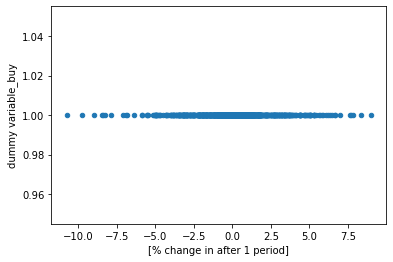

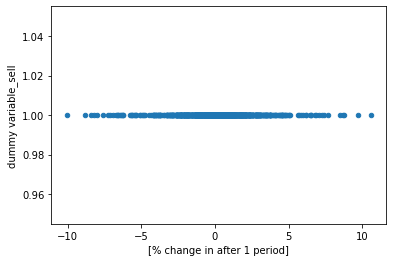

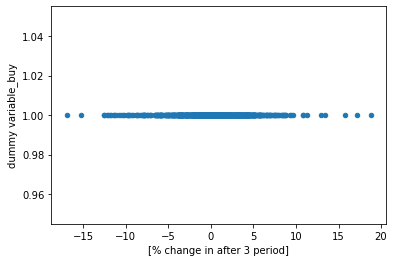

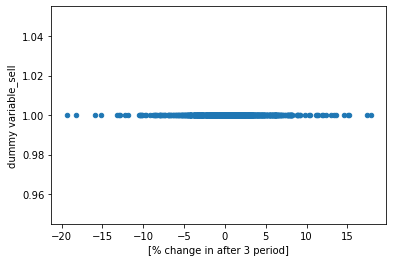

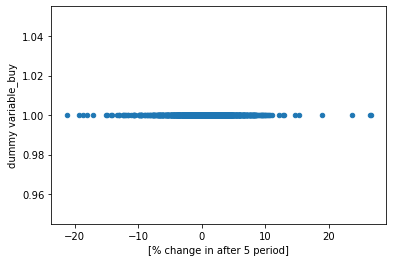

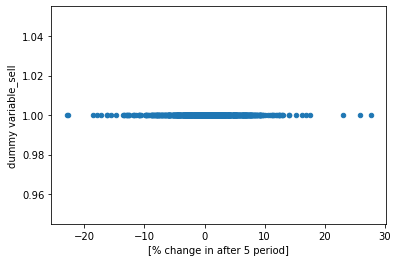

In [153]:
Regression_data_Charlie = Regression_data.loc[Regression_data['Counterparty'] == 'Charlie the Chad']
Regression_data_Charlie_buy = Regression_data_Charlie.loc[Regression_data['dummy variable_buy'] == 1]
ax1 = Regression_data_Charlie_buy.plot.scatter(y='dummy variable_buy',x=['% change in after 1 period'])
Regression_data_Charlie_sell = Regression_data_Charlie.loc[Regression_data['dummy variable_buy'] == 0]
ax2 = Regression_data_Charlie_sell.plot.scatter(y='dummy variable_sell',x=['% change in after 1 period'])

ax3 = Regression_data_Charlie_buy.plot.scatter(y='dummy variable_buy',x=['% change in after 3 period'])
Regression_data_Charlie_sell = Regression_data_Charlie.loc[Regression_data['dummy variable_buy'] == 0]
ax4 = Regression_data_Charlie_sell.plot.scatter(y='dummy variable_sell',x=['% change in after 3 period'])

ax5 = Regression_data_Charlie_buy.plot.scatter(y='dummy variable_buy',x=['% change in after 5 period'])
Regression_data_Charlie_sell = Regression_data_Charlie.loc[Regression_data['dummy variable_buy'] == 0]
ax6 = Regression_data_Charlie_sell.plot.scatter(y='dummy variable_sell',x=['% change in after 5 period'])

**Charlie: <br><br>Run for buy, after 1 period, after 3 period, after 5 period**

In [131]:
x= Regression_data_Charlie_buy['dummy variable_buy']
y = Regression_data_Charlie_buy['% change in after 1 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 1 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:29:44   Log-Likelihood:                -2212.5
No. Observations:                         987   AIC:                             4427.
Df Residuals:                             986   BIC:                             4432.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 1 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:29:44   Log-Likelihood:                -2212.5
No. Observations:                         987   AIC:                             4427.
Df Residuals:                             986   BIC:                             4432.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
dummy variable_buy     0.0378      0.073      0.522      0.602      -0.104       0.180
==============================================================================
Omnibus:                       64.641   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.967
Skew:                          -0.154   Prob(JB):                     1.43e-54
Kurtosis:                       5.436   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
x= Regression_data_Charlie_buy['dummy variable_buy']
y = Regression_data_Charlie_buy['% change in after 3 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 3 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:55:44   Log-Likelihood:                -2710.9
No. Observations:                         987   AIC:                             5424.
Df Residuals:                             986   BIC:                             5429.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 3 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:55:44   Log-Likelihood:                -2710.9
No. Observations:                         987   AIC:                             5424.
Df Residuals:                             986   BIC:                             5429.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
dummy variable_buy     0.1546      0.120      1.287      0.198      -0.081       0.390
==============================================================================
Omnibus:                       71.672   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.910
Skew:                          -0.180   Prob(JB):                     5.55e-65
Kurtosis:                       5.658   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
x= Regression_data_Charlie_buy['dummy variable_buy']
y = Regression_data_Charlie_buy['% change in after 5 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 5 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:55:52   Log-Likelihood:                -2965.5
No. Observations:                         986   AIC:                             5933.
Df Residuals:                             985   BIC:                             5938.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 5 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:55:52   Log-Likelihood:                -2965.5
No. Observations:                         986   AIC:                             5933.
Df Residuals:                             985   BIC:                             5938.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
dummy variable_buy     0.3280      0.156      2.102      0.036       0.022       0.634
==============================================================================
Omnibus:                       77.829   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.675
Skew:                          -0.030   Prob(JB):                     3.63e-88
Kurtosis:                       6.130   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
a=Regression_data_Charlie_buy['% change in after 1 period'].mean()
b=Regression_data_Charlie_buy['% change in after 3 period'].mean()
c=Regression_data_Charlie_buy['% change in after 5 period'].mean()

Reg_Charlie = [a,b,c]
Reg_Charlie

[0.03784180936233908, 0.15462164429885167, 0.3280364014010089]

**Charlie: <br><br>Run for sell, after 1 period, after 3 period, after 5 period**

In [156]:
x= Regression_data_Charlie_sell['dummy variable_sell']
y = Regression_data_Charlie_sell['% change in after 1 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 1 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:55:56   Log-Likelihood:                -2221.2
No. Observations:                         980   AIC:                             4444.
Df Residuals:                             979   BIC:                             4449.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 1 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:55:56   Log-Likelihood:                -2221.2
No. Observations:                         980   AIC:                             4444.
Df Residuals:                             979   BIC:                             4449.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_sell     0.1366      0.075      1.832      0.067      -0.010       0.283
==============================================================================
Omnibus:                       66.307   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.829
Skew:                          -0.075   Prob(JB):                     1.41e-62
Kurtosis:                       5.637   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
x= Regression_data_Charlie_sell['dummy variable_sell']
y = Regression_data_Charlie_sell['% change in after 3 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 3 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:30:34   Log-Likelihood:                -2753.2
No. Observations:                         978   AIC:                             5508.
Df Residuals:                             977   BIC:                             5513.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 3 period   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:30:34   Log-Likelihood:                -2753.2
No. Observations:                         978   AIC:                             5508.
Df Residuals:                             977   BIC:                             5513.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_sell     0.4028      0.129      3.116      0.002       0.149       0.656
==============================================================================
Omnibus:                       71.093   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.604
Skew:                          -0.067   Prob(JB):                     1.62e-72
Kurtosis:                       5.845   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
x= Regression_data_Charlie_sell['dummy variable_sell']
y = Regression_data_Charlie_sell['% change in after 5 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                OLS Regression Results                                
Dep. Variable:     % change in after 5 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:30:44   Log-Likelihood:                -2989.6
No. Observations:                         978   AIC:                             5981.
Df Residuals:                             977   BIC:                             5986.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     % change in after 5 period   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                                15:30:44   Log-Likelihood:                -2989.6
No. Observations:                         978   AIC:                             5981.
Df Residuals:                             977   BIC:                             5986.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_sell     0.4665      0.165      2.835      0.005       0.144       0.789
==============================================================================
Omnibus:                       75.376   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.506
Skew:                          -0.045   Prob(JB):                     1.06e-82
Kurtosis:                       6.042   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
a=Regression_data_Charlie_sell['% change in after 1 period'].mean()
b=Regression_data_Charlie_sell['% change in after 3 period'].mean()
c=Regression_data_Charlie_sell['% change in after 5 period'].mean()

Reg_Charlie = [a,b,c]
Reg_Charlie

[0.13663081013378037, 0.4027595758682052, 0.46651643541643767]

<font size="5">**Thoughts for improvement**</font> <br><br>
    Solicit bids and offers from other OTC MMs once OTC deal is completed, To check if price adversely changes after OTC Deal
        
Include data when counterparties submit queries but did not execute

<br><br>

"“If you see four client trades executed with no regard to the post-trade market impact and find you’re offside in less than a second, then OK – it gives you a high 
degree of confidence, even if you don’t have a large number of trades. But if you’re ending up offside after 25 minutes, then you need a lot of them to draw any conclusions,” says Chris Purves, head of UBS Investment Bank’s strategic development lab in London."

<br>
https://www.risk.net/derivatives/5750516/hunt-for-toxic-flow-hits-one-of-bankings-old-problems

   
